Загружаем необходимые библиотеки, сам титаник, смотрим структуру таблицы

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


titanic = pd.read_csv('Notebooks/train.csv')
titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Смотрим описательные статистики

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# числовая статистика
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Здесь видим, что средний возраст пассажира ~ 29 лет, медианный - 28, минимальнй - меньше года, максимальный - 80 лет. Большинство пассажиров в возрасте от 20 до 38 лет. Однако стоит обратить внимание что у около 20% пассажиров не указан возраст, поэтому сведения о возрасте могут быть изменены в случае наличия выбросов у тех или иных пассажиров, которые не указали возраст (см.ниже). Средняя сумма заплаченная за билет - 32,2, медианная - 14,4. Максимальная сумма, заплаченная за билет - 512.32, минимальная - 0. Большинство пассажиров купили билеты по цене от 7,9 до 31



In [6]:
# категориальная (нечисловая) статистика
titanic.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Здесь обращаем внимание, на то, что у каждого пассажира уникальное имя, мужчин большинство (577 из 891).

Кроме того видим, что номера билетов не уникальны (общее количество - 891, уникальных - 681) Вероятно это групповые либо семейные билеты. Кроме того не уникальны номера кают. Количество кают значительно меньше количества пассажиров, что говорит о том, что у многих пассажиров информация о каюте отсутствует. 147 уникальных записей о каютах и то, что некоторые каюты встречаются в билетах чаще других говорит о том, что в некоторых каютах жило несколько человек. Embarked count 889 говорот о том, что 2 человека не сообщили в каком из 3 портов они сели на корабль. Чаще всего люди садились в порту S - 644 человека

In [ ]:
Выявляем, анализируем и обрабатываем пропущенные данные.

In [7]:
fill_data=titanic.count()
na_data=titanic.isna().sum()
data=pd.concat([fill_data,na_data],axis=1,keys=['fill_data','na_data'])
data['rate_of_na']=(data.na_data/data.fill_data.max())*100
data.sort_values(by='rate_of_na',ascending=False)

,fill_data,na_data,rate_of_na
Cabin,204,687,77.104377
Age,714,177,19.865320
Embarked,889,2,0.224467
PassengerId,891,0,0.000000
Survived,891,0,0.000000
Pclass,891,0,0.000000
Name,891,0,0.000000
Sex,891,0,0.000000
SibSp,891,0,0.000000
Parch,891,0,0.000000


Я предлагаю исключить данные о номерах каюты из дальнейших расчётов.

Теоретически, возможно, номер каюты может свидетельствовать о возможности быстрее или медленнее спастись (например, каюты с бОльшим арифметическим номером находятся ближе к днищу коробля). Но т.к. в исходных данных об этом ничего не сказано и 77% потеряны, я считаю такое решение целесообразным.

Также не заполнены сведения о возрасте ~20% пассажиров. Заполним пропущенные данные. Я предлагаю для этого возраст людей, у которых он не заполнен, заполнить медианным возрастом остальных пасажиров. Возможно, разумно было бы рассмотреть возможность также его отбросить, но я предполагаю, что этот фактор может существенно влиять на выживаемость (с одной стороны, дети и пожилые люди беспомощнее, с другой в их отношении окружающие склонны проявлять больший альтруизм и могут, например, спасать их в первую очередь). В любом случае данная фича требует рассмотрения.

Что касается двух человек, у которых не указан порт посадки - я также предлагаю заполнить его наиболее часто встречающимя портом. Теоретически, порт также может влиять на выживаемость (например в одном из портов могли садиться более богатые люди, которые заняли более комфортабельные каюты, благодаря чему спаслись). Далее к этому вопросу можно вернуться, но мне кажется, что это задача для отдельного исследования =)

In [8]:
titanic = titanic.drop('Cabin',axis=1)
titanic.Age=titanic.Age.fillna(titanic.Age.median())
titanic.Embarked=titanic.Embarked.fillna(titanic.Embarked.mode()[0])

In [ ]:
Снова посмотрим на данные

In [9]:
fill_data=titanic.count()
na_data=titanic.isna().sum()
data=pd.concat([fill_data,na_data],axis=1,keys=['fill_data','na_data'])
data['rate_of_na']=(data.na_data/data.fill_data.max())*100
data.sort_values(by='rate_of_na',ascending=False)

,fill_data,na_data,rate_of_na
PassengerId,891,0,0.0
Survived,891,0,0.0
Pclass,891,0,0.0
Name,891,0,0.0
Sex,891,0,0.0
Age,891,0,0.0
SibSp,891,0,0.0
Parch,891,0,0.0
Ticket,891,0,0.0
Fare,891,0,0.0


Пропуски обработаны

Далее посмотрим соотношение погибших к выжившим, как в абсолютном, так и в относительном варианте и визуализируем это дело (а то чтото уже много текста без картинок). Поскольку задача - определить факторы, влияющие на выживаемость, данные цифры не плохо бы знать =)

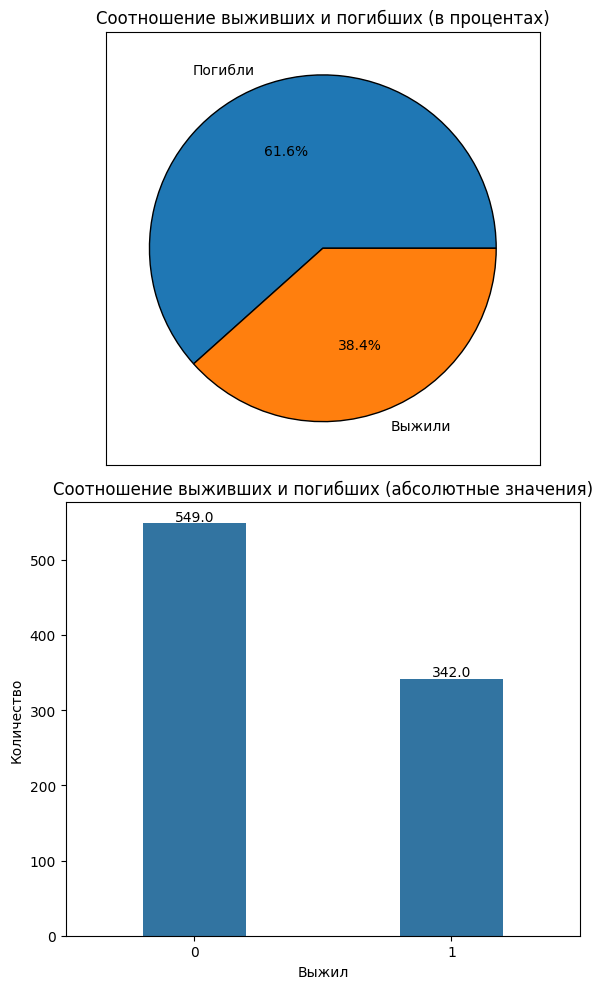

In [10]:
# Создаем область для двух графиков
fig, axes = plt.subplots(2, 1, figsize=(6,10))
fig.subplots_adjust(hspace=0.4)

# Круговая диаграмма (проценты)
survived_counts = titanic.Survived.value_counts()
survived_percentage = survived_counts / survived_counts.sum() * 100
axes[0].pie(survived_percentage, labels=['Погибли', 'Выжили'], autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
axes[0].set_title('Соотношение выживших и погибших (в процентах)')
axes[0].set_frame_on(True)

# Столбчатая диаграмма (абсолютные значения)
ax = sns.countplot(x='Survived', data=titanic, ax=axes[1], width=0.4)
ax.bar
axes[1].set_xlabel('Выжил')
axes[1].set_ylabel('Количество')
axes[1].set_title('Соотношение выживших и погибших (абсолютные значения)')

# Добавляем значения над столбцами
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha="center")

plt.tight_layout()
plt.show()

Видим, что выжило менее 40% пассажиров (549/342). Далее посмотрим распределение среди выживших и умерших среди людей с каютами разных классов.

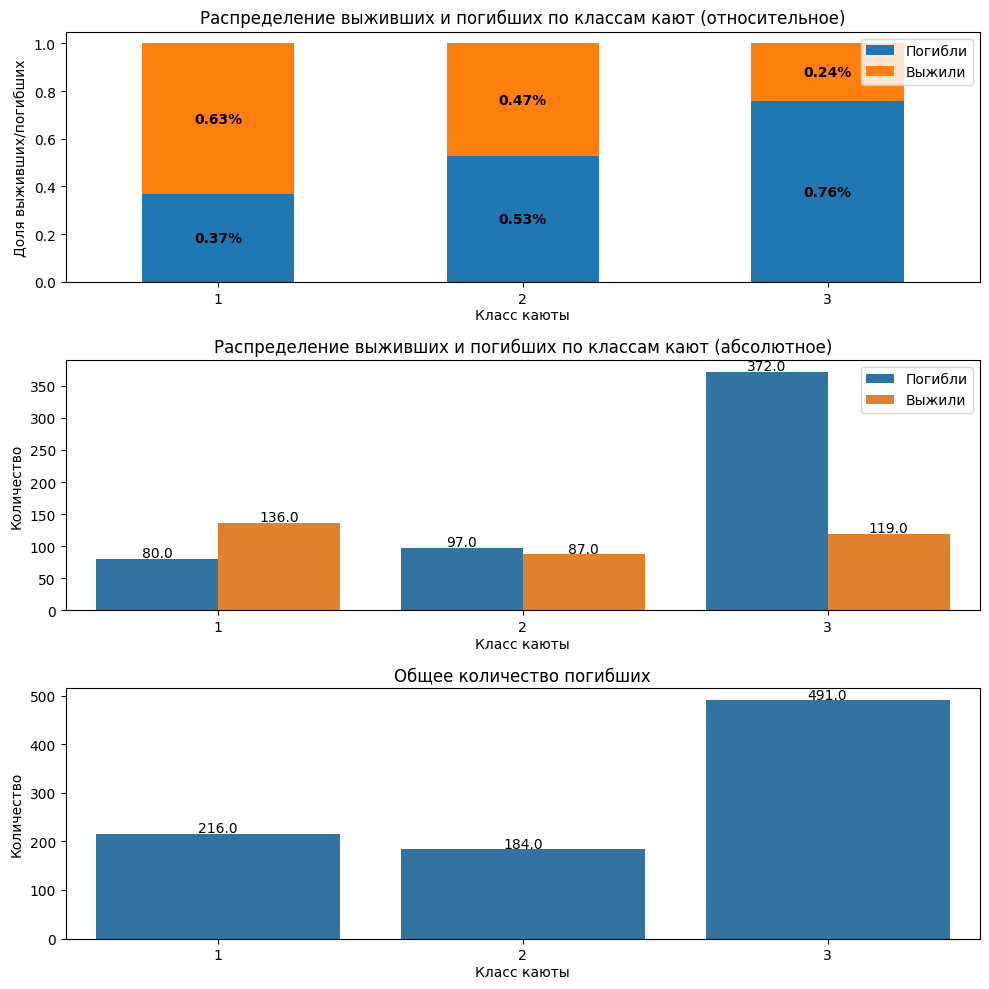

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(10,10))
fig.subplots_adjust(hspace=0.3)
# первый график - относительный
pclass_survived = titanic.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()
ax0 = pclass_survived.plot(kind='bar', stacked=True, ax=axes[0])
ax0.tick_params(axis='x', rotation=0)
axes[0].set_xlabel('Класс каюты', labelpad=2)
axes[0].set_ylabel('Доля выживших/погибших')
axes[0].set_title('Распределение выживших и погибших по классам кают (относительное)')
axes[0].legend(['Погибли', 'Выжили'])

# добавляем значения
for container in ax0.containers:
    ax0.bar_label(container, fmt='%0.2f%%', label_type='center', weight='bold')

# второй график - абсолютный
ax1 = sns.countplot(x='Pclass', hue='Survived', data=titanic, ax=axes[1])
axes[1].set_xlabel('Класс каюты', labelpad=2)
axes[1].set_ylabel('Количество')
axes[1].set_title('Распределение выживших и погибших по классам кают (абсолютное)')
axes[1].legend(['Погибли', 'Выжили'])

# добавляем значения на второй график
for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        ax1.text(p.get_x() + p.get_width() / 2., height + 3, height, ha="center")

# третий график - общее количество погибших
ax2 = sns.countplot(x='Pclass',data=titanic, ax=axes[2])
axes[2].set_xlabel('Класс каюты', labelpad=2)
axes[2].set_ylabel('Количество')
axes[2].set_title('Общее количество погибших')


# добавляем значения
for p in ax2.patches:
    height = p.get_height()
    if height > 0:
        ax2.text(p.get_x() + p.get_width() / 2., height + 3, height, ha="center")

plt.tight_layout()
plt.show()

Видим что в абсолютных числах, среди общего числа, пассажиров 3 класса погибло больше, чем пассажиров 1 и 2 класса вместе взятых. Кроме того, среди пассажиров 3 класса выжило лишь 24%, в то время как у других классов доля выживших свыше 47%.

Также видим, что у пассажиров 2 класса вероятность спастись и погибнуть практически равна (47/53), но в целом их погибло меньше всех.

У пассажиров 1 класса наибольший процент спасённых среди "одноклассников", однако в сумме их погибло больше, чем пассажиров 2 класса. Предполагаю, что это связано с человеческим фактором и требует дополнительного анализа.

В целом, делаем вывод, что класс влияет на выживаемость

Далее мы проверим как пол пассажира повлиял на выживаемость
Для начала посмотрим на общее количество мужчин и женщин

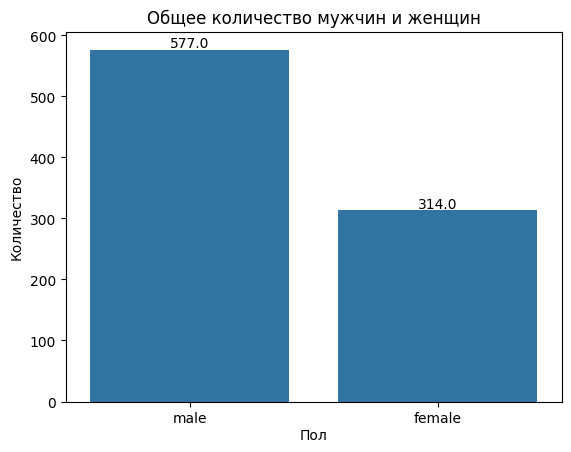

In [12]:
# общее количество мужчин и женщин
ax = sns.countplot(x='Sex', data=titanic)
ax.tick_params(axis='x', rotation=0)
plt.xlabel('Пол', labelpad=2)
plt.ylabel('Количество')
plt.title('Общее количество мужчин и женщин')

# добавляем значения
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha="center")

Мужчин на титанике было значительно больше, чем женщин

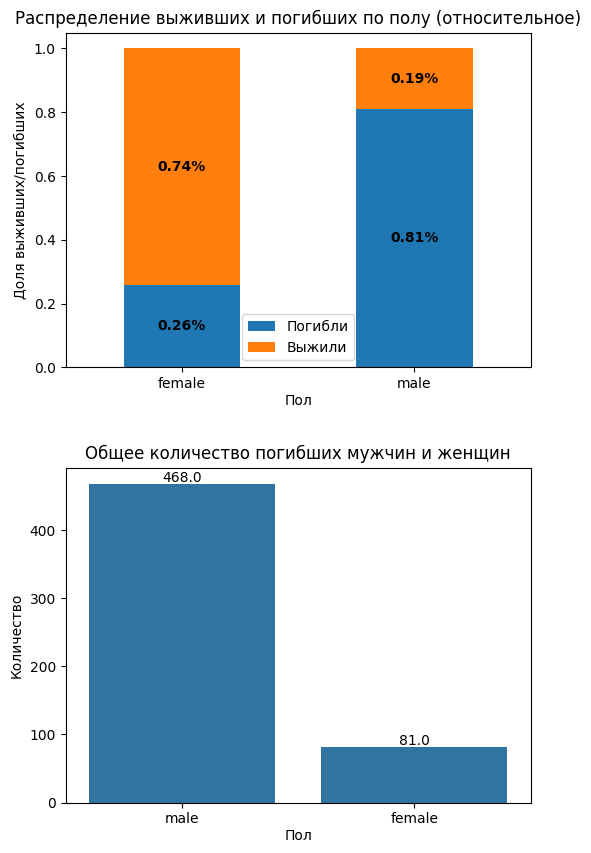

In [14]:
# относительное количество погибших

fig, axes = plt.subplots(2, 1, figsize=(6, 10))
fig.subplots_adjust(hspace=0.3)
pclass_survived = titanic.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()
ax0 = pclass_survived.plot(kind='bar', stacked=True, ax=axes[0])
ax0.tick_params(axis='x', rotation=0)
axes[0].set_xlabel('Пол', labelpad=2)
axes[0].set_ylabel('Доля выживших/погибших')
axes[0].set_title('Распределение выживших и погибших по полу (относительное)')
axes[0].legend(['Погибли', 'Выжили'])

# добавляем занчения
for container in ax0.containers:
    ax0.bar_label(container, fmt='%0.2f%%', label_type='center', weight='bold')

# второй график - общее количество погибших мужчин и женщин
ax1=sns.countplot(x='Sex', data=titanic.query('Survived==0'), ax=axes[1])
ax1.tick_params(axis='x', rotation=0)
axes[1].set_xlabel('Пол', labelpad=2)
axes[1].set_ylabel('Количество')
axes[1].set_title('Общее количество погибших мужчин и женщин')

# добавляем занчения
for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        ax1.text(p.get_x() + p.get_width() / 2., height + 3, height, ha="center")

Здесь мы видим, что погибших среди мужчин значительно больше - как в абсолютном исчеслении, так и в относительном. Скорее всего это связано с человеческими качествами и требует дополнительного анализа. Пол безусловно влиял на шанс выжить на Титанике

Далее нужно проверить влияние возраста на выживаемость. Для этого сперва необходимо предобработать данные, например, установив 4 категории - для детей от 0 до 17 лет, от 18 до 38 для молодых людей, для зрелых людей от 39 лет до 55 и для пожилых людей старше 55 лет. Для этого введем новый столбец

In [15]:
titanic['Age_category'] = pd.cut(titanic.Age, bins=[0, 17, 38, 55, np.inf], labels=['Child', 'Yong', 'Adult', 'Old'])

Далее мы смотрим количество людей в каждой категории, процент выживших относительно погибших в каждой категории, процент каждой категории среди всех погибших, абсолютное количество погибших по каждой категории

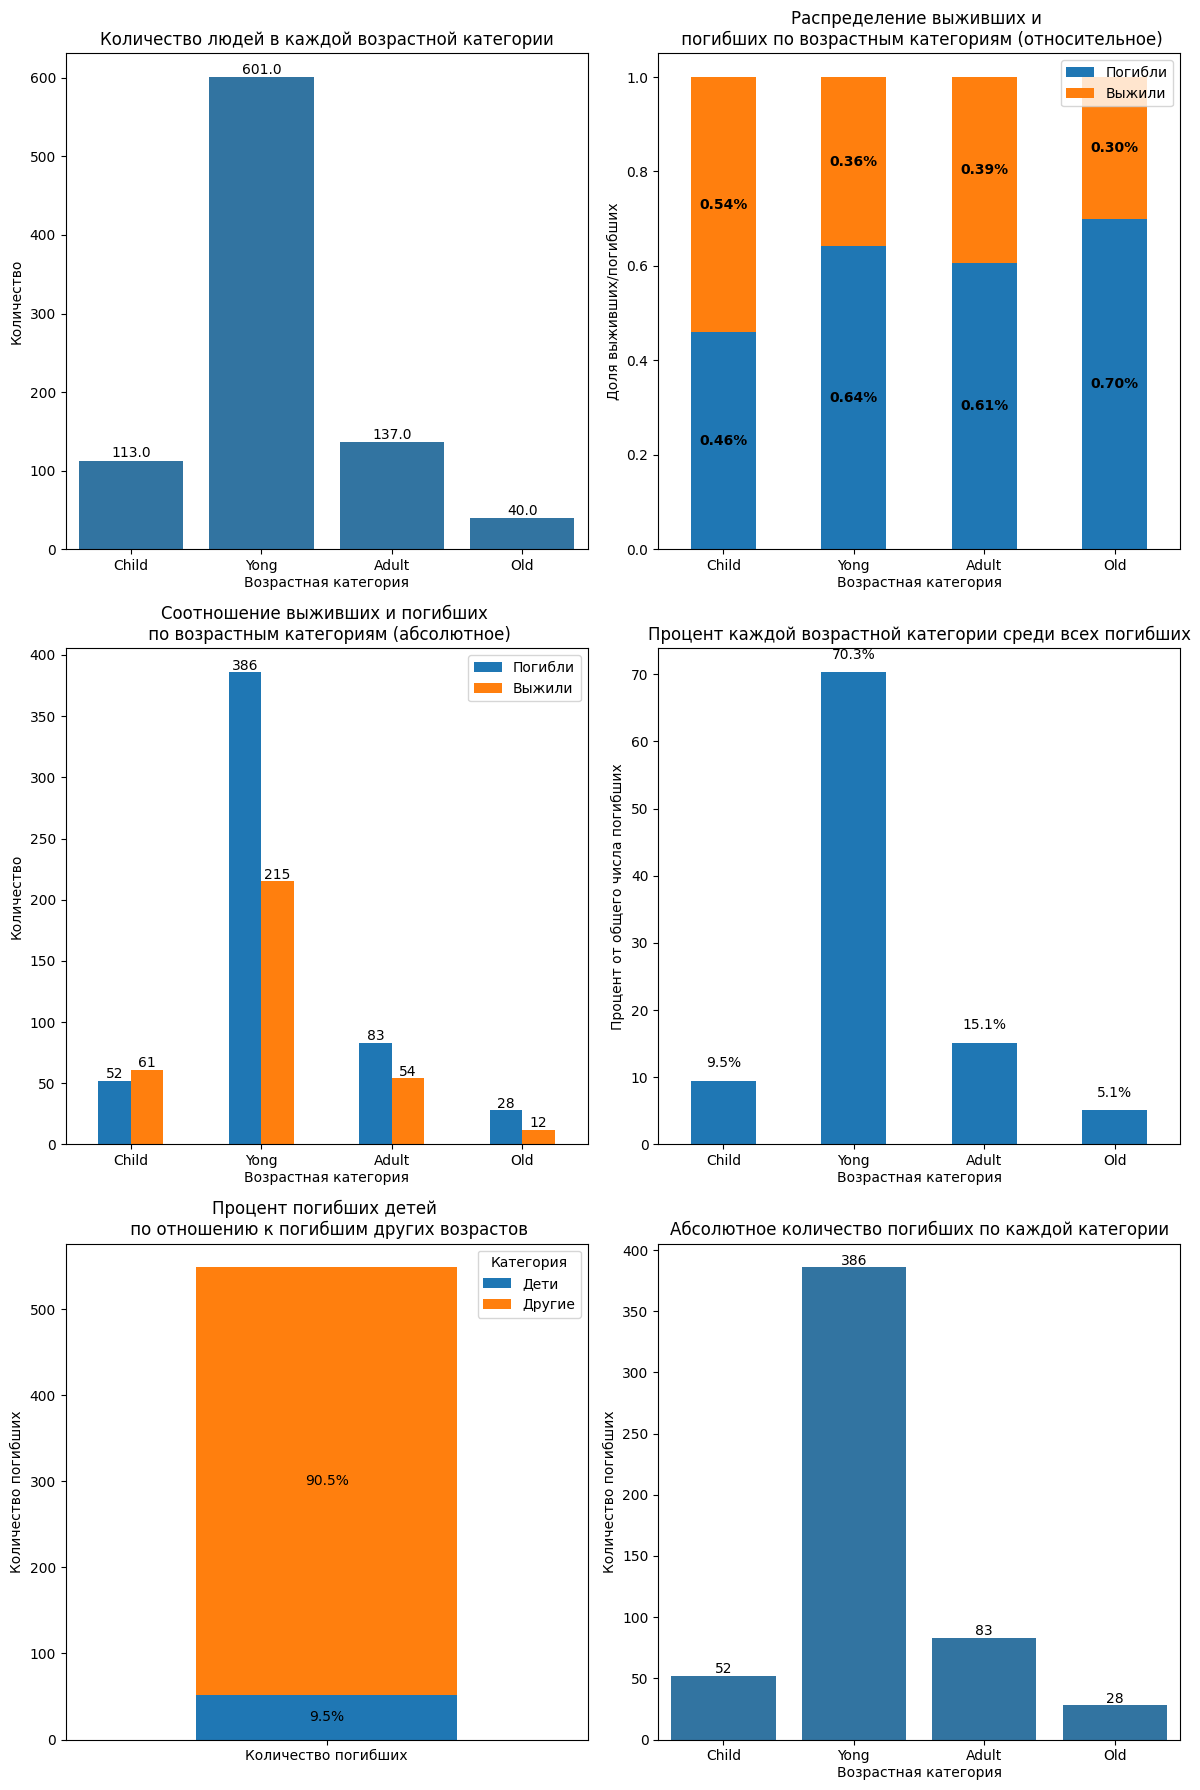

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

order=['Child','Yong','Adult','Old']

# первый график - количество людей в каждой возрастной категории
sns.countplot(x='Age_category', data=titanic, ax=axes[0, 0],order=order)
axes[0, 0].set_xlabel('Возрастная категория', labelpad=2)
axes[0, 0].set_ylabel('Количество')
axes[0, 0].set_title('Количество людей в каждой возрастной категории')
for p in axes[0, 0].patches:
    height = p.get_height()
    if height > 0:
        axes[0, 0].text(p.get_x() + p.get_width() / 2., height + 4, height, ha="center")

# второй график - распределение выживших и погибших по возрастным категориям (относительное)
age_survived = titanic.groupby(['Age_category'], observed=False)['Survived'].value_counts(normalize=True).unstack()
age_survived.loc[order].plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_xlabel('Возрастная категория', labelpad=2)
axes[0, 1].set_ylabel('Доля выживших/погибших')
axes[0, 1].set_title('Распределение выживших и \n погибших по возрастным категориям (относительное)')
axes[0, 1].legend(['Погибли', 'Выжили'])
plt.setp(axes[0, 1].get_xticklabels(), rotation=0)
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt='%0.2f%%', label_type='center', weight='bold')

# третий график - оотношение выживших и погибших по возрастным категориям (абсолютное)
survived_by_age_category = titanic.groupby(['Age_category', 'Survived'], observed=False)['PassengerId'].count().unstack()
survived_by_age_category.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_xlabel('Возрастная категория', labelpad=2)
axes[1, 0].set_ylabel('Количество')
axes[1, 0].set_title('Соотношение выживших и погибших \n по возрастным категориям (абсолютное)')
axes[1, 0].legend(['Погибли', 'Выжили'])
plt.setp(axes[1, 0].get_xticklabels(), rotation=0)
for p in axes[1, 0].patches:
    height = p.get_height()
    if height > 0:
        axes[1, 0].text(p.get_x() + p.get_width() / 2., height + 2, int(height), ha="center")

# четвертый график - процент каждой возрастной категории среди всех погибших
survived_by_age = titanic.query('Survived == 0')['Age_category'].value_counts()
total_survived = titanic.query('Survived == 0')['Age_category'].count()
percentage_survived_by_age = (survived_by_age / total_survived) * 100
percentage_survived_by_age.loc[order].plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_xlabel('Возрастная категория', labelpad=2)
axes[1, 1].set_ylabel('Процент от общего числа погибших')
axes[1, 1].set_title('Процент каждой возрастной категории среди всех погибших')
plt.setp(axes[1, 1].get_xticklabels(), rotation=0)
for p in axes[1, 1].patches:
    height = p.get_height()
    if height > 0:
        axes[1, 1].text(p.get_x() + p.get_width() / 2., height + 2, '{:.1f}%'.format(height), ha="center")

# пятый график - процент погибших детей по отношению к погибшим других возрастов
child_deaths = titanic.query('Survived == 0 and Age_category == "Child"')['Age_category'].count()
other_deaths = titanic.query('Survived == 0 and Age_category != "Child"')['Age_category'].count()
data = pd.DataFrame({
    'Категория': ['Дети', 'Другие'],
    'Количество погибших': [child_deaths, other_deaths]
})
data.set_index('Категория').T.plot(kind='bar', stacked=True, ax=axes[2, 0])
axes[2, 0].set_ylabel('Количество погибших')
axes[2, 0].set_title('Процент погибших детей \n по отношению к погибшим других возрастов')
plt.setp(axes[2, 0].get_xticklabels(), rotation=0)
for p in axes[2, 0].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    axes[2, 0].text(x + width / 2,
             y + height / 2,
             '{:.1f}%'.format(100 * height / data['Количество погибших'].sum()),
             ha='center',
             va='center')

# шестой график - абсолютное количество погибших по каждой категории
sns.countplot(x='Age_category', data=titanic.query('Survived == 0'), ax=axes[2, 1],order=order)
axes[2, 1].set_xlabel('Возрастная категория', labelpad=2)
axes[2, 1].set_ylabel('Количество погибших')
axes[2, 1].set_title('Абсолютное количество погибших по каждой категории')
for p in axes[2, 1].patches:
    height = p.get_height()
    if height > 0:
        axes[2, 1].text(p.get_x() + p.get_width() / 2., height + 2, int(height), ha="center")
plt.tight_layout()
plt.show()

Здесь мы видим, что большая часть пассажиров - люди среднего возраста (что уже было изучено в числовой статистике), меньше всего пожилых людей. В то же время у пожилых люей наименьший показатель выживаемости (30%), следом за ними люди среднего возраста, потом зрелые, а дальше дети. Это говорит о том, что возраст влияет на выживаемость, причем дети составляют лишь ~10% от общего количества погибших.

Я понимаю, что можно сделать еще значительное количество группировок, сравнений и графиков, рассмотреть распределение выживших по возрастам с учётом только тех людей, о которых известны сведения о возрасте, а также исследовать множество взаимосвязей, например:
- влияние количества братьев и сестер на выживаемость,
- влияние титула на выживаемость,
- влияние наличия каюты на выживаемость,
- влияние количества родителей и детей на выживаемость,
- анализ влияния ценовой категории билета на выживаемость,
- влияние числа выживших членов семьи на шансы выжить,
- влияние порта посадки на выживаемость,
а также множественных факторов, например женщин/мужчин определенного класса/возраста, имеющих детей, семейных/одиноких и тд и тп. Количество возможных критерий для исследования бесчисленно.
Дальше я приступлю конкретно к поиску ключевых факторов выживания при крушении.

Необходимо предобработать данные с помощью get_dummies - закодируем в виде бинарных качественные признаки, которые могут иметь значение.

In [17]:
titanic_dummies = pd.get_dummies(titanic, columns=['Sex'], drop_first=True)
titanic_dummies = pd.get_dummies(titanic_dummies, columns=['Embarked', 'Pclass','Age_category'])

Дальше мы убираем несущественные факторы - айди пассажира, номер билета и имя (хотя из имени можно вытащить титул, в данном случае предлагаю им пренебречь)

In [18]:
titanic_dummies = titanic_dummies.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

И наконец, строим матрицу корреляции

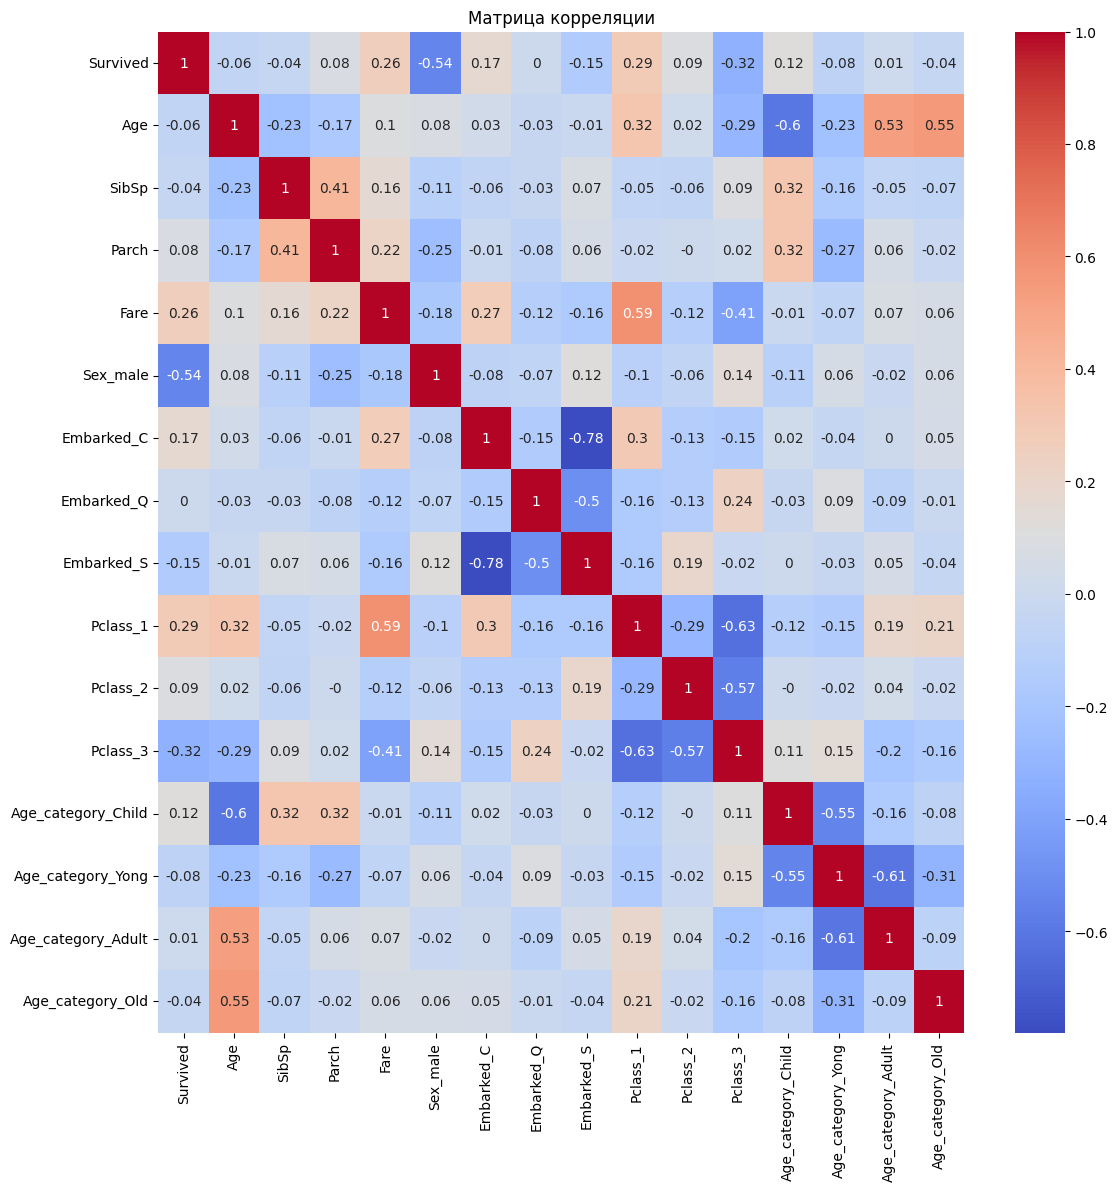

In [19]:
corr_matrix = titanic_dummies.corr().round(2)
plt.figure(figsize=(13, 13))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

Рассмотрев эту таблицу можно сделать вывод о том, что три главных фактора, влияющие на выживаемость:

- пол (Sex_male, корреляция -0.54) - мужчины погибали чаще;
  
- класс каюты (Pclass_3, корреляция -0.32) - пассажиры 3 класса погибали чаще, пассажиры 1 класса спасались чаще (Pclass_1, корреляция 0.29);

- цена за билет, однако исходя из базовой логики и нехитрой формулы "titanic[['Fare','Pclass']].sort_values(by='Fare', ascending=False).head(20) можно сделать вывод о том, что дорогие билеты покупали пассажиры 1 класса;

- факт того, что пассажир ребенок (корреляция 0.13, в то время как у остальных категорий она отсутствует или отрицательная) - дети выживали чаще.


Таким образом главные факторы, способствующие выживанию пассажиров титаника - это пол, класс каюты и возраст